SVM

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

In [45]:
data=load_iris()
df=data.data
y=data.target
features=data.feature_names

In [3]:
df=pd.DataFrame(data=df, columns=features)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
dfpcas=pca.fit_transform(df)
dfpcas

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [6]:
pcadf=pd.DataFrame(data=dfpcas, columns=["PC"+str(i) for i in range(2)])
pcadf

,PC0,PC1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


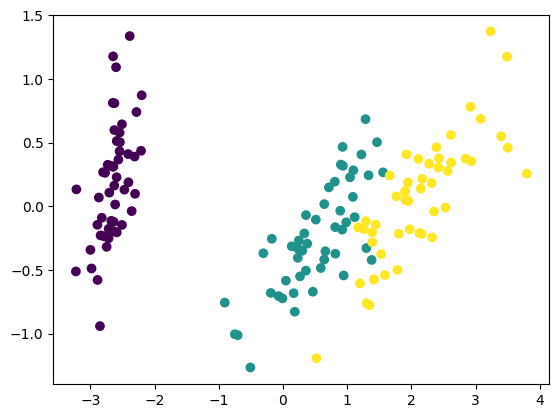

In [7]:
plt.scatter(pcadf["PC0"], pcadf["PC1"], c=y)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pcadf, y, test_size=0.2)

In [10]:
from sklearn import svm

model=svm.SVC(kernel="linear", C=1)
model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [11]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 2, 1,
       0, 1, 1, 2, 1, 2, 0, 0])

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 13  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.96        14
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

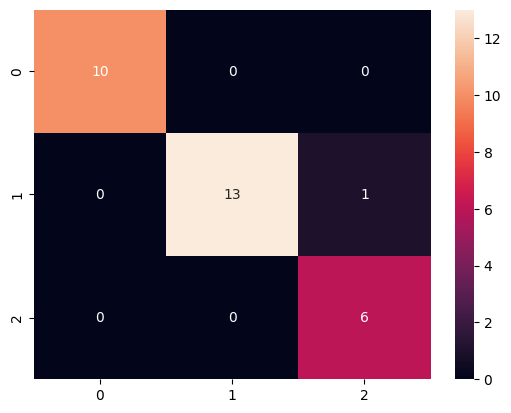

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

/home/siddharth/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:>

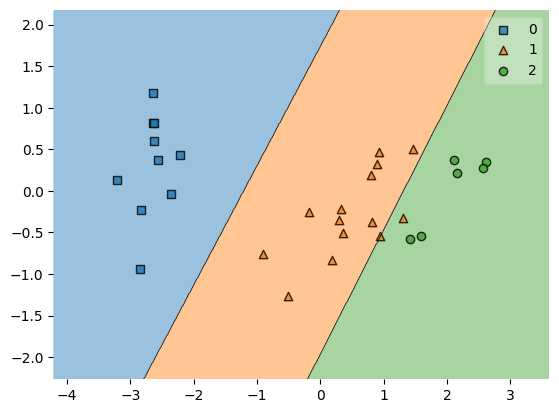

In [16]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(x_test), np.array(y_test), clf=model, legend=1)

/home/siddharth/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


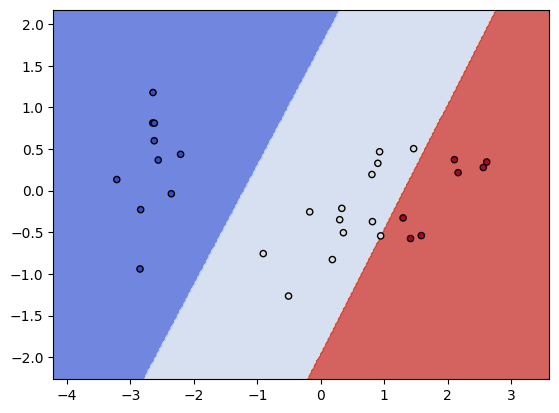

In [17]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, model, xx, yy, **params):
    z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    z=z.reshape(xx.shape)
    out=ax.contourf(xx, yy, z, **params)
    return out

fig, ax = plt.subplots()
x, y = x_test["PC0"], x_test["PC1"]
xx, yy = make_meshgrid(x, y)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x, y, c=y_pred, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [18]:
model2=svm.SVC(kernel="poly", C=1)
model2.fit(x_train, y_train)

SVC(C=1, kernel='poly')

In [19]:
y_pred2=model2.predict(x_test)
y_pred2

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 2, 1,
       0, 1, 1, 2, 1, 2, 0, 0])

In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 13  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.96        14
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



/home/siddharth/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:>

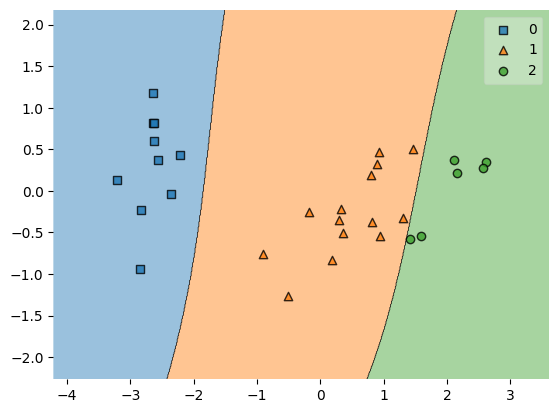

In [23]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.array(x_test), np.array(y_test), clf=model2, legend=1)

/home/siddharth/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


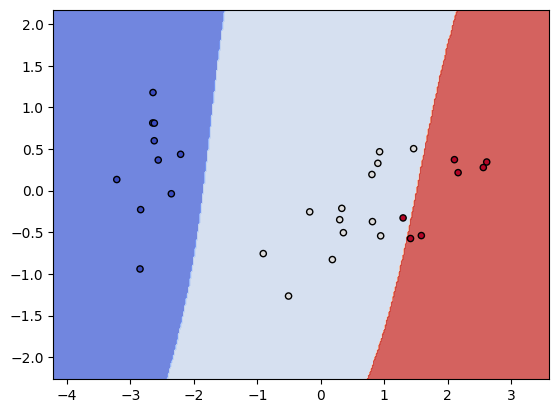

In [26]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy, np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, model, xx, yy, **params):
    z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    z=z.reshape(xx.shape)
    out=ax.contourf(xx, yy, z, **params)
    return out

fig, ax = plt.subplots()
x, y = x_test["PC0"], x_test["PC1"]
xx, yy = make_meshgrid(x, y)
plot_contours(ax, model2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x, y, c=y_pred, cmap=plt.cm.coolwarm, s=20, edgecolor="k")

KMEANS

In [39]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=3, random_state=42)
y_pred=model.fit_predict(pcadf)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [40]:
x=np.array(pcadf)

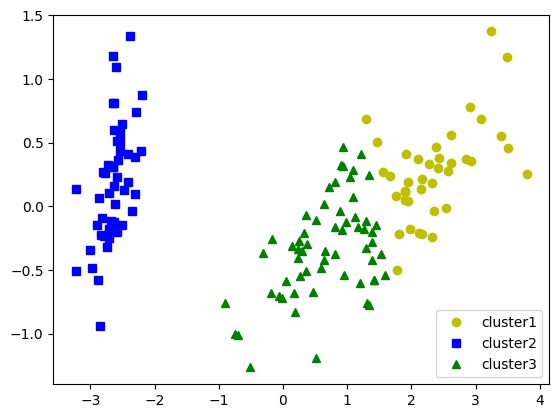

In [41]:
plt.plot(x[y_pred==0, 0], x[y_pred==0, 1], "yo", label="cluster1")
plt.plot(x[y_pred==1, 0], x[y_pred==1, 1], "bs", label="cluster2")
plt.plot(x[y_pred==2, 0], x[y_pred==2, 1], "g^", label="cluster3")
plt.legend()
plt.show()

In [46]:
from scipy import stats

mapping={}
for id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==id])
    mapping[mode[0]]=id

print(mapping)
y_pred=np.array([mapping[i] for i in y_pred])

{1: 0, 2: 1, 0: 2}


/tmp/ipykernel_22926/2055078265.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==id])


In [48]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.94      0.85        50
           2       0.92      0.72      0.81        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



In [49]:
from sklearn.mixture import GaussianMixture

model=GaussianMixture(n_components=3, random_state=42)
y_pred=model.fit_predict(pcadf)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

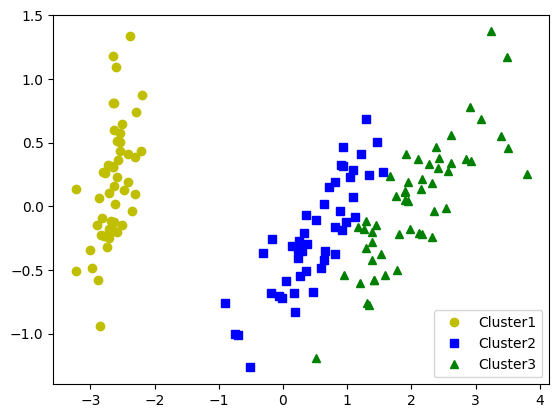

In [54]:
plt.plot(x[y_pred==0, 0], x[y_pred==0, 1], "yo", label="Cluster1")
plt.plot(x[y_pred==1, 0], x[y_pred==1, 1], "bs", label="Cluster2")
plt.plot(x[y_pred==2, 0], x[y_pred==2, 1], "g^", label="Cluster3")
plt.legend()
plt.show()

In [53]:
from scipy import stats

mapping={}
for id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==id])
    mapping[mode[0]]=id

print(mapping)
y_pred=np.array([mapping[i] for i in y_pred])

{1: 0, 2: 1, 0: 2}


/tmp/ipykernel_22926/2055078265.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(y_pred[y==id])


In [55]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

